# Pyspark + Python 2

Taiwanese financial company

In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master('local').getOrCreate()

In [3]:
spark_df = spark.read.csv('credit_card_default.csv', header='true', inferSchema='true')

In [4]:
spark_df.take(5)

[Row(ID=1, LIMIT_BAL=20000, SEX=2, EDUCATION=2, MARRIAGE=1, AGE=24, PAY_0=2, PAY_2=2, PAY_3=-1, PAY_4=-1, PAY_5=-2, PAY_6=-2, BILL_AMT1=3913, BILL_AMT2=3102, BILL_AMT3=689, BILL_AMT4=0, BILL_AMT5=0, BILL_AMT6=0, PAY_AMT1=0, PAY_AMT2=689, PAY_AMT3=0, PAY_AMT4=0, PAY_AMT5=0, PAY_AMT6=0, default payment next month=1),
 Row(ID=2, LIMIT_BAL=120000, SEX=2, EDUCATION=2, MARRIAGE=2, AGE=26, PAY_0=-1, PAY_2=2, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=2, BILL_AMT1=2682, BILL_AMT2=1725, BILL_AMT3=2682, BILL_AMT4=3272, BILL_AMT5=3455, BILL_AMT6=3261, PAY_AMT1=0, PAY_AMT2=1000, PAY_AMT3=1000, PAY_AMT4=1000, PAY_AMT5=0, PAY_AMT6=2000, default payment next month=1),
 Row(ID=3, LIMIT_BAL=90000, SEX=2, EDUCATION=2, MARRIAGE=2, AGE=34, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=29239, BILL_AMT2=14027, BILL_AMT3=13559, BILL_AMT4=14331, BILL_AMT5=14948, BILL_AMT6=15549, PAY_AMT1=1518, PAY_AMT2=1500, PAY_AMT3=1000, PAY_AMT4=1000, PAY_AMT5=1000, PAY_AMT6=5000, default payment next month=0),
 Ro

In [5]:
# 1st option
spark_df.columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [14]:
# 2nd option
spark_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- default payment next month: inte

In [17]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

for col in categorical_columns:
    print(f"\nDistinct values in column: {col}")
    spark_df.select(col).distinct().orderBy(col).show()


Distinct values in column: SEX
+---+
|SEX|
+---+
|  1|
|  2|
+---+


Distinct values in column: EDUCATION
+---------+
|EDUCATION|
+---------+
|        0|
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
+---------+


Distinct values in column: MARRIAGE
+--------+
|MARRIAGE|
+--------+
|       0|
|       1|
|       2|
|       3|
+--------+


Distinct values in column: default payment next month
+--------------------------+
|default payment next month|
+--------------------------+
|                         0|
|                         1|
+--------------------------+



## Barplots of EDUCATION and MARRIAGE

In [10]:
spark_df_edu = spark_df.groupBy('EDUCATION').agg({'EDUCATION': 'count'})
spark_df_edu.collect()

[Row(EDUCATION=1, count(EDUCATION)=10585),
 Row(EDUCATION=6, count(EDUCATION)=51),
 Row(EDUCATION=3, count(EDUCATION)=4917),
 Row(EDUCATION=5, count(EDUCATION)=280),
 Row(EDUCATION=4, count(EDUCATION)=123),
 Row(EDUCATION=2, count(EDUCATION)=14030),
 Row(EDUCATION=0, count(EDUCATION)=14)]

In [12]:
import pandas as pd

+---------+-----+
|EDUCATION|count|
+---------+-----+
|        0|   14|
|        1|10585|
|        2|14030|
|        3| 4917|
|        4|  123|
|        5|  280|
|        6|   51|
+---------+-----+



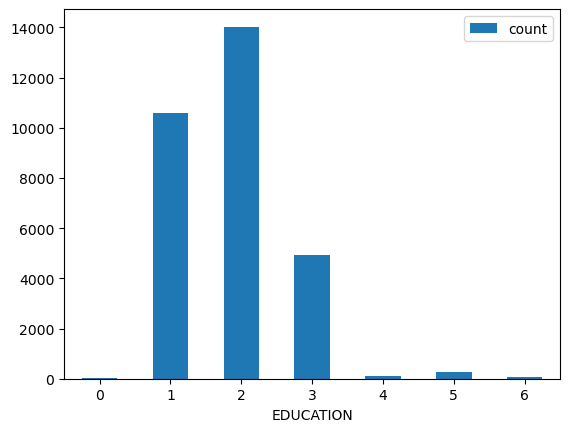

In [19]:
# Create bar plot of EDUCATION

# First, aggregate data, i INCLDED ORDERBY EDUCATION
education_cats = spark_df.groupBy('EDUCATION').count().orderBy('EDUCATION')
education_cats.show()

# Then plot data
education_cats.toPandas().plot(x="EDUCATION", y="count", kind="bar", rot=0);

In [26]:
from pyspark.sql.functions import when, col

In [36]:
education_cats_labeled = education_cats.select(
    when(col("EDUCATION") == 1, "Graduate")
    .when(col("EDUCATION") == 2, "College")
    .when(col("EDUCATION") == 3, "High School")
    .when(col("EDUCATION") == 4, "Other")
    #.when(col("EDUCATION") == 5, "5")
    #.when(col("EDUCATION") == 6, "6")
    #.when(col("EDUCATION") == 0, "0")
    .otherwise("Other")
    .alias("EDUCATION"),
    col("count")
)

education_cats_labeled.show()

+-----------+-----+
|  EDUCATION|count|
+-----------+-----+
|      Other|   14|
|   Graduate|10585|
|    College|14030|
|High School| 4917|
|      Other|  123|
|      Other|  280|
|      Other|   51|
+-----------+-----+



In [37]:
from pyspark.sql import functions as F

In [38]:
# Merging Option
education_labeled = education_cats.select(
    F.when(F.col("EDUCATION") == 1, "Graduate")
     .when(F.col("EDUCATION") == 2, "College")
     .when(F.col("EDUCATION") == 3, "High School")
     .otherwise("Other")
     .alias("EDUCATION"),
    F.col("count")
)

In [39]:
# Step 3: Group again to merge "Other" values into one row
education_binned = education_labeled.groupBy("EDUCATION").agg(F.sum("count").alias("count")).orderBy("EDUCATION")

In [40]:
# Step 4: Display final result
education_binned.show()

+-----------+-----+
|  EDUCATION|count|
+-----------+-----+
|    College|14030|
|   Graduate|10585|
|High School| 4917|
|      Other|  468|
+-----------+-----+



<Axes: xlabel='EDUCATION'>

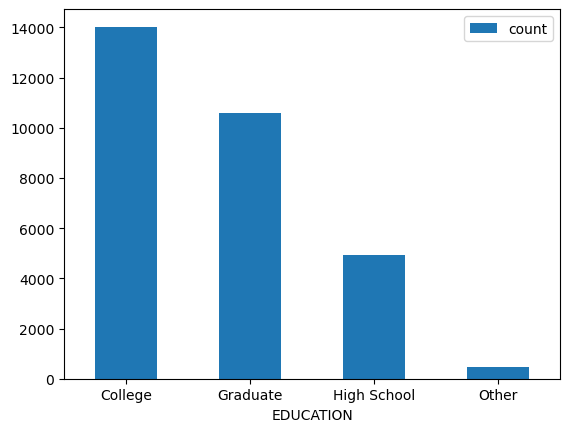

In [41]:
education_binned.toPandas().plot(x="EDUCATION", y="count", kind="bar", rot=0)

### Barcharts for (non-)defaults

In [47]:
default = spark_df.groupBy('default payment next month').count().orderBy('default payment next month')
default.show()

+--------------------------+-----+
|default payment next month|count|
+--------------------------+-----+
|                         0|23364|
|                         1| 6636|
+--------------------------+-----+



In [48]:
# Labels

default_labeled = default.select(
    when(col("default payment next month") == 1, "non-defaults")
    .otherwise("defaults")
    .alias("default payment next month"),
    F.col("count")
)

default_labeled.show()

+--------------------------+-----+
|default payment next month|count|
+--------------------------+-----+
|                  defaults|23364|
|              non-defaults| 6636|
+--------------------------+-----+



In [51]:
default_binned = default_labeled.groupBy("default payment next month").agg(F.sum("count").alias("count"))
default_binned.show()

+--------------------------+-----+
|default payment next month|count|
+--------------------------+-----+
|              non-defaults| 6636|
|                  defaults|23364|
+--------------------------+-----+



<Axes: xlabel='default payment next month'>

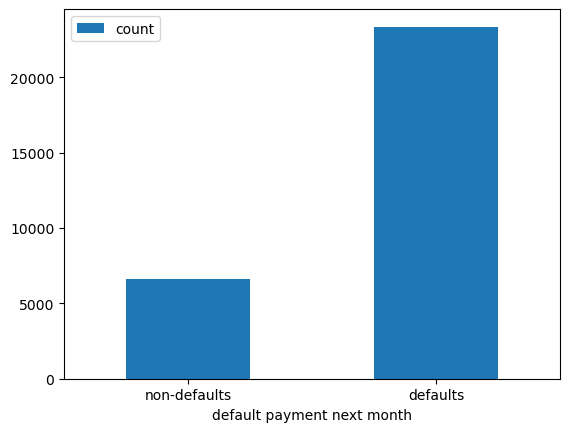

In [53]:
default_binned.toPandas().plot(x="default payment next month", y="count", kind="bar", rot=0)

### Barcharts for (non-)defaults & SEX

In [57]:
s.printSchema()

root
 |-- default payment next month: string (nullable = false)
 |-- count: long (nullable = false)



In [ ]:
default = spark_df.groupBy('default payment next month').count().orderBy('default payment next month')
default.show()

In [59]:
default_sex = spark_df.groupBy("SEX", "default payment next month").count()
default_sex.show()

+---+--------------------------+-----+
|SEX|default payment next month|count|
+---+--------------------------+-----+
|  1|                         0| 9015|
|  1|                         1| 2873|
|  2|                         1| 3763|
|  2|                         0|14349|
+---+--------------------------+-----+



In [67]:
# Labels
default_sex_labeled = default_sex.select(
    when(col("default payment next month") == 1, "non-defaults")
    .otherwise("defaults")
    .alias("default payment NEXT month"),
    when(col("SEX") == 1, "Male")
    .otherwise("Female")
    .alias("Client SEX"),
    F.col("count")
)

default_sex_labeled.show()

+--------------------------+----------+-----+
|default payment NEXT month|Client SEX|count|
+--------------------------+----------+-----+
|                  defaults|      Male| 9015|
|              non-defaults|      Male| 2873|
|              non-defaults|    Female| 3763|
|                  defaults|    Female|14349|
+--------------------------+----------+-----+



In [70]:
default_sex_binned = default_sex_labeled.groupBy("default payment NEXT month", 'Client SEX').agg(F.sum("count").alias("count"))
default_sex_binned.show()

+--------------------------+----------+-----+
|default payment NEXT month|Client SEX|count|
+--------------------------+----------+-----+
|              non-defaults|    Female| 3763|
|                  defaults|      Male| 9015|
|              non-defaults|      Male| 2873|
|                  defaults|    Female|14349|
+--------------------------+----------+-----+



<Axes: xlabel='Client SEX'>

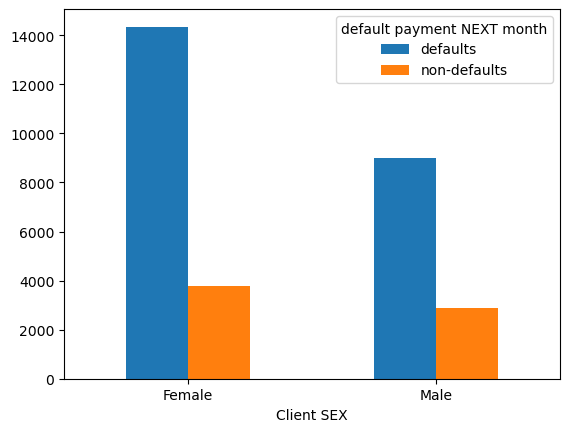

In [73]:
default_sex_labeled.toPandas().pivot(index="Client SEX", columns="default payment NEXT month", values="count").plot(kind="bar", rot=0)

<Axes: xlabel='Client SEX'>

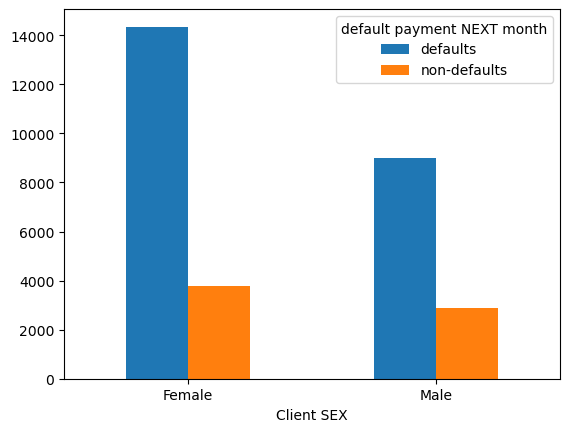

In [76]:
default_sex_binned.toPandas().pivot(index="Client SEX", columns="default payment NEXT month", values="count").plot(kind="bar", rot=0)